#**Samima Siddiq**

### **Machine Learning Intern @SYNC Intern's**

### **Task 2: Real-time Face Mask Detection**

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
#Extracting dataset
dataset="/content/drive/MyDrive/Colab Notebooks/archive (1).zip"

In [4]:
from zipfile import ZipFile

In [5]:
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  drive  sample_data


In [11]:
mask_dir = "/content/data/with_mask"
no_mask_dir = '/content/data/without_mask'

In [29]:
# Define label dictionary
label_dict = {'mask': 1, 'no_mask': 0}

# Create empty arrays to store images and labels
images = []
labels = []

# Loop through mask images and append to arrays
for img_path in os.listdir(mask_dir):
    img = cv2.imread(os.path.join(mask_dir, img_path))
    img = cv2.resize(img, (128, 128))  # Resize image if necessary
    images.append(img)
    labels.append(label_dict['mask'])

# Loop through images without masks and append to arrays
for img_path in os.listdir(no_mask_dir):
    img = cv2.imread(os.path.join(no_mask_dir, img_path))
    img = cv2.resize(img, (128, 128))  # Resize image if necessary
    images.append(img)
    labels.append(label_dict['no_mask'])

In [30]:
#Checking label values
unique_values = set(labels)
print(unique_values)

{0, 1}


In [31]:
#Count of with mask and without mask data
count_of_zeros = labels.count(0)
count_of_ones = labels.count(1)

print(f"Number of 0s: {count_of_zeros}")
print(f"Number of 1s: {count_of_ones}")

Number of 0s: 3828
Number of 1s: 3725


In [32]:
print(len(labels))

7553


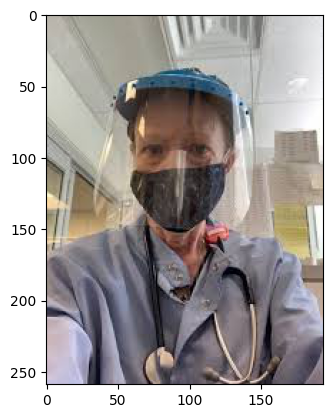

In [16]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_2894.jpg')
imgplot = plt.imshow(img)
plt.show()

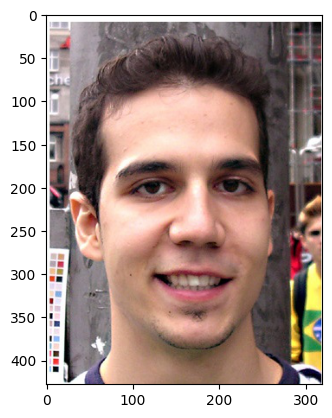

In [17]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3605.jpg')
imgplot = plt.imshow(img)
plt.show()

In [33]:
# Convert lists to numpy arrays
data = np.array(images)
labels = np.array(labels)

In [34]:
len(data)

7553

In [35]:
data[0]

array([[[116, 100,  94],
        [115,  99,  93],
        [114,  98,  92],
        ...,
        [164, 151, 137],
        [183, 168, 155],
        [196, 180, 167]],

       [[116, 100,  94],
        [115,  99,  93],
        [114,  98,  92],
        ...,
        [162, 149, 135],
        [176, 161, 148],
        [185, 169, 156]],

       [[116, 100,  94],
        [115,  99,  93],
        [114,  98,  92],
        ...,
        [161, 148, 134],
        [169, 154, 141],
        [174, 158, 145]],

       ...,

       [[117, 111, 112],
        [123, 117, 118],
        [132, 126, 127],
        ...,
        [128, 102,  95],
        [133, 105,  99],
        [136, 108, 101]],

       [[108, 102, 103],
        [116, 110, 110],
        [128, 122, 122],
        ...,
        [121,  95,  88],
        [128, 101,  94],
        [133, 105,  98]],

       [[102,  96,  97],
        [108, 102, 103],
        [117, 111, 112],
        ...,
        [114,  88,  81],
        [124,  97,  90],
        [130, 102,  95]]

In [36]:
data[0].shape

(128, 128, 3)

In [22]:
type(data)

numpy.ndarray

In [37]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [24]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [38]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [39]:
#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [40]:
print(X_train.shape, X_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3)


In [41]:
# scaling the data

X_train_scaled = X_train/255.0

X_test_scaled = X_test/255.0


In [42]:
print(X_train[0])
print(X_train_scaled[0])

[[[39 30 33]
  [39 30 33]
  [38 31 32]
  ...
  [21 16 15]
  [25 20 19]
  [28 23 22]]

 [[38 29 32]
  [36 27 30]
  [33 26 28]
  ...
  [19 14 13]
  [22 17 16]
  [24 19 18]]

 [[37 28 32]
  [33 25 28]
  [28 22 23]
  ...
  [18 14 13]
  [19 15 14]
  [21 16 15]]

 ...

 [[19 19 19]
  [15 15 15]
  [17 17 17]
  ...
  [48 50 55]
  [73 76 80]
  [87 89 91]]

 [[20 20 20]
  [13 13 13]
  [13 13 13]
  ...
  [37 40 45]
  [63 66 70]
  [92 93 97]]

 [[21 21 21]
  [15 15 15]
  [12 12 12]
  ...
  [31 34 39]
  [58 61 66]
  [88 89 93]]]
[[[0.15294118 0.11764706 0.12941176]
  [0.15294118 0.11764706 0.12941176]
  [0.14901961 0.12156863 0.1254902 ]
  ...
  [0.08235294 0.0627451  0.05882353]
  [0.09803922 0.07843137 0.0745098 ]
  [0.10980392 0.09019608 0.08627451]]

 [[0.14901961 0.11372549 0.1254902 ]
  [0.14117647 0.10588235 0.11764706]
  [0.12941176 0.10196078 0.10980392]
  ...
  [0.0745098  0.05490196 0.05098039]
  [0.08627451 0.06666667 0.0627451 ]
  [0.09411765 0.0745098  0.07058824]]

 [[0.14509804 0.10

In [44]:
#model development
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [45]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [46]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 148s 864ms/step - loss: 0.4626 - acc: 0.7993 - val_loss: 0.3091 - val_acc: 0.8694
Epoch 2/10
170/170 [==============================] - 149s 877ms/step - loss: 0.2808 - acc: 0.8891 - val_loss: 0.3289 - val_acc: 0.8612
Epoch 3/10
170/170 [==============================] - 147s 868ms/step - loss: 0.2238 - acc: 0.9156 - val_loss: 0.1851 - val_acc: 0.9140
Epoch 4/10
170/170 [==============================] - 146s 858ms/step - loss: 0.1982 - acc: 0.9216 - val_loss: 0.2139 - val_acc: 0.9256
Epoch 5/10
170/170 [==============================] - 143s 843ms/step - loss: 0.1695 - acc: 0.9380 - val_loss: 0.2399 - val_acc: 0.9124
Epoch 6/10
170/170 [==============================] - 144s 849ms/step - loss: 0.1312 - acc: 0.9500 - val_loss: 0.2313 - val_acc: 0.9140
Epoch 7/10
170/170 [==============================] - 143s 843ms/step - loss: 0.1057 - acc: 0.9599 - val_loss: 0.2465 - val_acc: 0.9190
Epoch 8/10
170/170 [============================

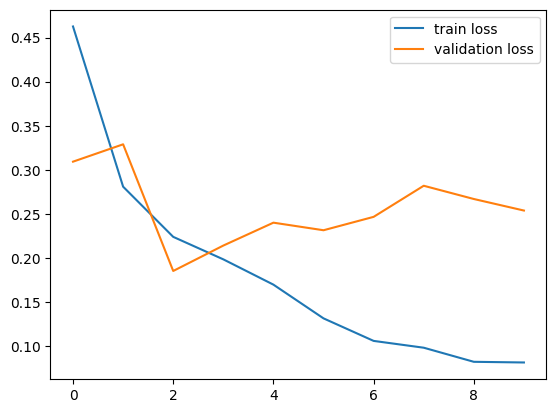

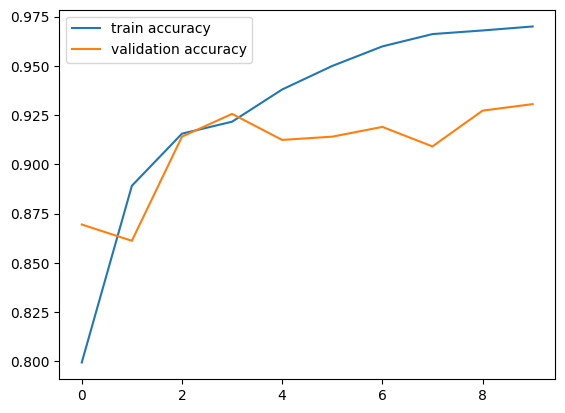

In [47]:
# Model Evaluation
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [48]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 13s 265ms/step - loss: 0.2653 - acc: 0.9371
Test Accuracy = 0.9371277093887329


Path of the image to be predicted: /content/drive/MyDrive/Colab Notebooks/test_image_1.jpg


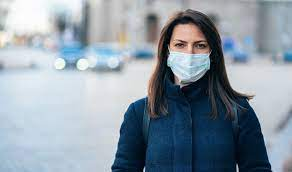

1/1 [==============================] - 0s 26ms/step
[[0.13444734 0.8715164 ]]
1
The person in the image is wearing a mask


In [54]:
# Predictive System

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/drive/MyDrive/Colab Notebooks/test_image.jpg


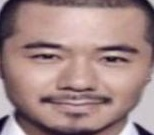

1/1 [==============================] - 0s 29ms/step
[[0.96694666 0.00821416]]
0
The person in the image is not wearing a mask


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')